# Object Detection with YOLO

In this notebook we will use the YOLO object detection model.

The code was adapted from https://github.com/ultralytics/yolov5/blob/master/tutorial.ipynb.

In [1]:
# installation
!git clone https://github.com/ultralytics/yolov5  # clone github repo
%cd yolov5
%pip install -qr requirements.txt 

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-223-g1dcb774 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/78.2 GB disk)


In [2]:
# upload and uncompress the images provided in the Moodle platform
!unzip "/content/images.zip" -d "/content/data"

Archive:  /content/images.zip
  inflating: /content/data/image1.jpg  
  inflating: /content/data/image2.jpg  
  inflating: /content/data/image3.jpg  
  inflating: /content/data/image4.jpg  
  inflating: /content/data/image5.jpg  


## Inference
Use the yolov5 model to perform object detection on the example images.

**Option 1:** using the detect.py script

You can find an example on how to use the detect.py script [here](https://github.com/ultralytics/yolov5/blob/master/tutorial.ipynb).

In [3]:
!python detect.py --weights yolov5s.pt --source "/content/data"

detect: weights=['yolov5s.pt'], source=/content/data, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-223-g1dcb774 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

100% 14.1M/14.1M [00:00<00:00, 187MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/5 /content/data/image1.jpg: 448x640 10 persons, 1 bicycle, 4 cars, 1 clock, Done. (0.017s)
image 2/5 /content/data/image2.jpg: 448x640 4 persons, Done. (0.012s)
image 3/5 /content/data/image3.jpg: 480x640 31 persons, 2 cars, Done. (0.025s)
image 4/5 /content/data/image4.jpg: 480x640 6 persons, 1 car, 4 buss, Done. (0.012s)
image 5/5 /content/data

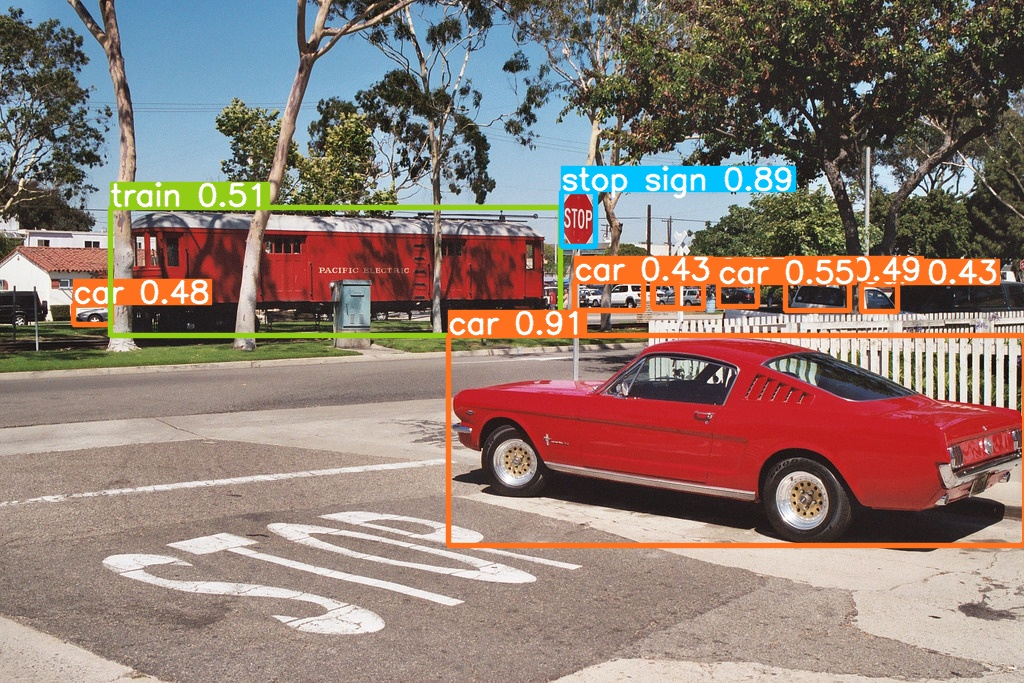

In [4]:
display.Image(filename="runs/detect/exp/image5.jpg")

**Option 2:** loading from torch hub

Check out the example [here](https://docs.ultralytics.com/tutorials/pytorch-hub/).

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v6.1-223-g1dcb774 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
Saved 1 image to runs/detect/exp_hub


image 1/1: 683x1024 8 cars, 1 train, 1 stop sign
Speed: 36.5ms pre-process, 17.2ms inference, 1.6ms NMS per image at shape (1, 3, 448, 640)


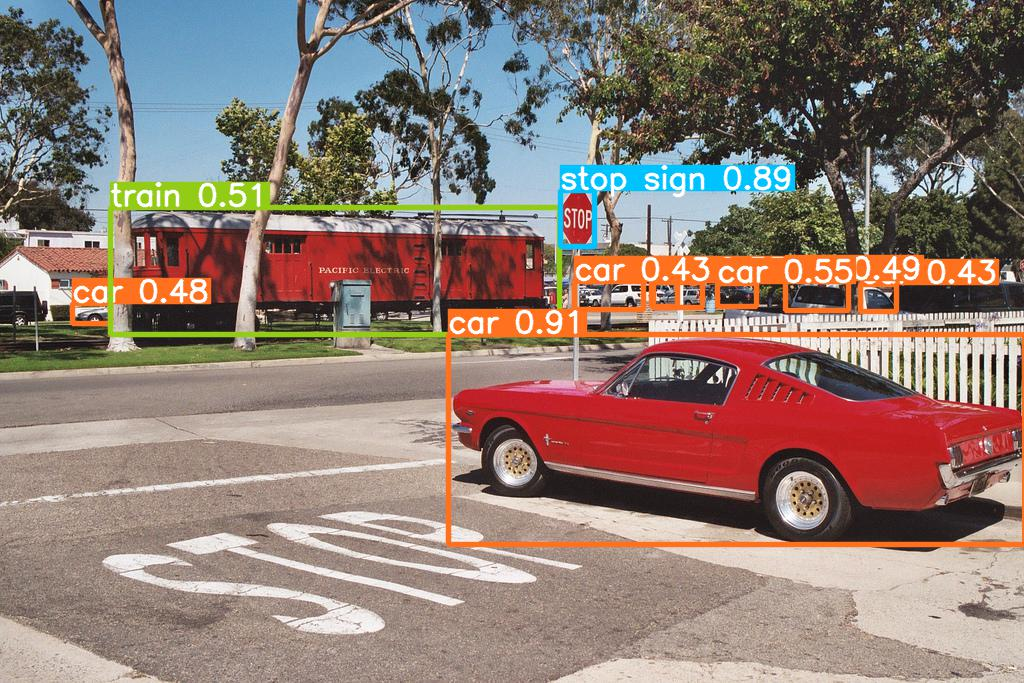

In [5]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Image
img = '/content/data/image5.jpg'

# Inference
results = model(img)

results.print()  
results.save(save_dir="runs/detect/exp_hub")
display.Image(filename="runs/detect/exp_hub/image5.jpg")

## Confidence Threshold

Increase/decrease the confidence threshold and compare the results.

When you increase/decrease the threshold, how does the number of detected objects change? And why?

Saved 1 image to runs/detect/exp_conf


image 1/1: 683x1024 1 car, 1 stop sign
Speed: 24.9ms pre-process, 13.4ms inference, 1.8ms NMS per image at shape (1, 3, 448, 640)


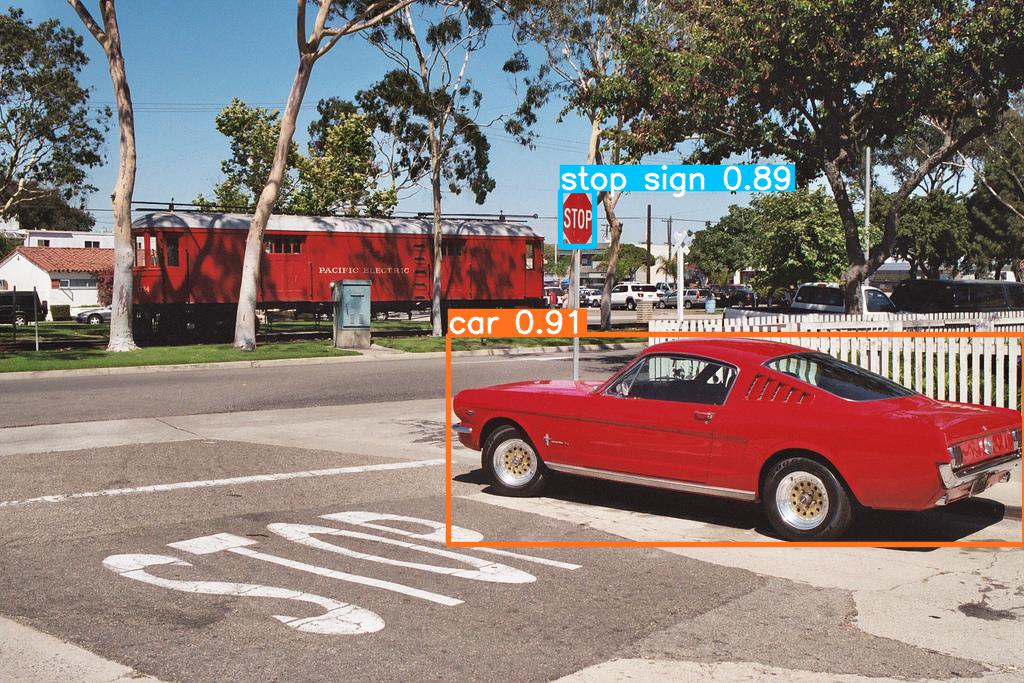

In [6]:
model.conf = 0.8  # confidence threshold (0-1)

results = model(img)
results.print()
results.save(save_dir="runs/detect/exp_conf")
display.Image(filename="runs/detect/exp_conf/image5.jpg")

## Non Maximum Suppression (NMS)

What is Non Maximum Suppression? Find out more about this technique [here](https://learnopencv.com/non-maximum-suppression-theory-and-implementation-in-pytorch/).

Increase/decrease the Non Maximum Suppression (NMS) threshold and compare the results.

When you increase/decrease the threshold, how does the number of detected objects change? And why?

Saved 1 image to runs/detect/exp_nms


image 1/1: 683x1024 7 cars, 1 train, 1 stop sign
Speed: 24.0ms pre-process, 12.3ms inference, 1.4ms NMS per image at shape (1, 3, 448, 640)


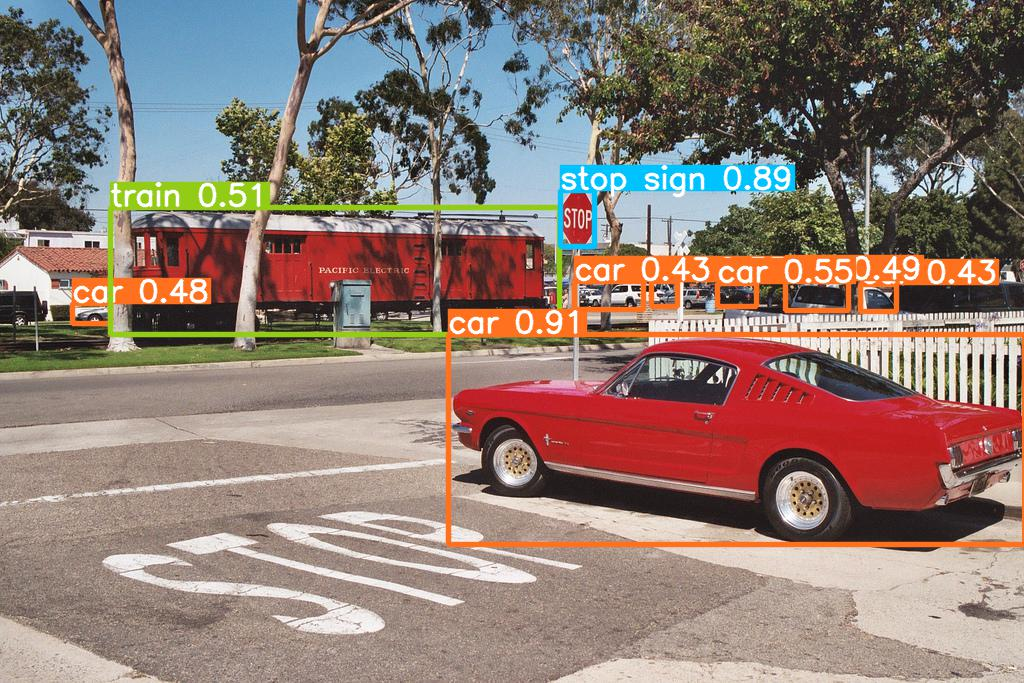

In [7]:
model.conf = 0.25 # let's get back to the default confidence threshold
model.iou = 0.1  # NMS IoU threshold (0-1)

results = model(img)
results.print()
results.save(save_dir="runs/detect/exp_nms")
display.Image(filename="runs/detect/exp_nms/image5.jpg")